import seaborn as sns
# ^^^ pyforest auto-imports - don't write above this line
# Paired-TTest

# Simulating P-values

Suppose you've read that 10% of the nation has coronavirus. You want to prove that in your school, you have a higher average.

To test your theory, you tested 40 people and observed that ~18% had coronavirus.

To see how likely a sample like this was to happen by chance, you perform a simulation: generate a simulation to test how likely it is to obtain a 18% proportion if the true proportion was indeed 10%. Run several tests and check how many times your results corroborates to your observation.

In [ ]:
P(A | B)

In [ ]:
P(do meu resultado ter dado 18% de coronavirus | a hipotese nula é verdadeira) --> pvalue

alpha --> 0.05  (significance level = 1-alpha = 95%)

In [2]:
import numpy as np

In [150]:
(values >= 0.18).mean()

0.04225

Calculate its mean:

In [99]:
np.mean(values)

0.15

In [100]:
print([np.mean(np.random.choice([0, 1], p=[0.9, 0.1], size=40)) for i in range(100)])

[0.025, 0.1, 0.05, 0.1, 0.1, 0.075, 0.075, 0.125, 0.1, 0.175, 0.025, 0.1, 0.075, 0.1, 0.1, 0.125, 0.025, 0.125, 0.25, 0.1, 0.025, 0.125, 0.075, 0.05, 0.05, 0.125, 0.15, 0.1, 0.125, 0.15, 0.075, 0.1, 0.1, 0.15, 0.075, 0.125, 0.0, 0.025, 0.15, 0.1, 0.05, 0.05, 0.075, 0.125, 0.025, 0.075, 0.125, 0.05, 0.075, 0.075, 0.15, 0.125, 0.125, 0.175, 0.1, 0.075, 0.275, 0.075, 0.075, 0.075, 0.025, 0.075, 0.1, 0.15, 0.075, 0.15, 0.05, 0.15, 0.075, 0.025, 0.075, 0.075, 0.125, 0.1, 0.1, 0.075, 0.05, 0.05, 0.15, 0.075, 0.1, 0.15, 0.075, 0.175, 0.125, 0.1, 0.075, 0.05, 0.075, 0.125, 0.075, 0.2, 0.075, 0.175, 0.075, 0.125, 0.05, 0.1, 0.2, 0.025]


Count how many times you observe values >= 18%

In [101]:
(np.array([np.mean(np.random.choice([0, 1], p=[0.9, 0.1], size=40)) for i in range(100)]) > 0.18).mean()

0.08

That's what the p-value represents. If the distribution was indeed ~10%, you would only find values >= 18% in 5% of the times.

In [151]:
values = np.array([np.random.choice([0, 1], p=[0.9, 0.1], size=40).mean() for i in range(1000)])

In [98]:
values = np.random.choice([0, 1], p=[0.9, 0.1], size=40)
values

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

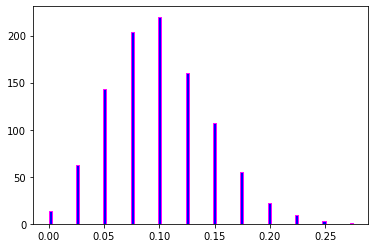

In [152]:
plt.hist(values, facecolor='blue',edgecolor='magenta', bins=100);
plt.xticks(np.arange(0, .26,0.02));
plt.yticks(np.arange(0, 26, 2));

# Applications of Hypothesis Testing

In [153]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from scipy import stats
import researchpy as rp

https://github.com/Opensourcefordatascience/Data-sets/blob/master/blood_pressure.csv

This dataset contains blood pressure readings before and after an <b>intervention</b>. These are variables “bp_before” and “bp_after”.

In [154]:
bp_reading = pd.read_csv('https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/blood_pressure.csv')

In [155]:
bp_reading.sample(10)

,patient,sex,agegrp,bp_before,bp_after
111,112,Female,60+,159,143
6,7,Male,30-45,148,133
66,67,Female,30-45,154,134
18,19,Male,30-45,143,136
72,73,Female,30-45,141,168
39,40,Male,46-59,160,174
30,31,Male,46-59,175,151
10,11,Male,30-45,149,164
100,101,Female,60+,168,178
14,15,Male,30-45,143,153


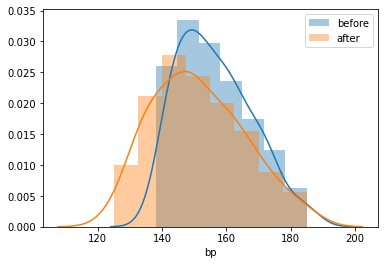

In [158]:
import seaborn as sns
sns.distplot(bp_reading.bp_before, label='before')
sns.distplot(bp_reading.bp_after, label='after')
plt.xlabel('bp')
plt.legend()

In [159]:
bp_reading.shape

(120, 5)

In [160]:
bp_reading.describe().T

,count,mean,std,min,25%,50%,75%,max
patient,120.0,60.500000,34.785054,1.0,30.75,60.5,90.25,120.0
bp_before,120.0,156.450000,11.389845,138.0,147.00,154.5,164.00,185.0
bp_after,120.0,151.358333,14.177622,125.0,140.75,149.5,161.00,185.0


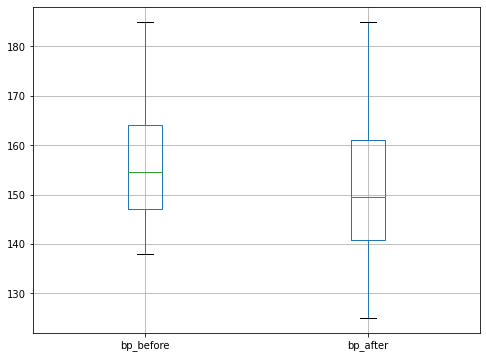

In [161]:
bp_reading[['bp_before', 'bp_after']].boxplot(figsize=(8, 6))

## The hypothesis being tested

* __Null hypothesis (H0): u1 = u2, which translates to the mean of sample 01 is equal to the mean of sample 02__
* __Alternative hypothesis (H1): u1 ? u2, which translates to the means of sample 01 is not equal to sample 02__ 

## Assumption check 

* The samples are independently and randomly drawn
* The distribution of the residuals between the two groups should follow the normal distribution
* The variances between the two groups are equal

In [162]:
# levene --> variance test: H0 variances are equal
stats.levene(bp_reading['bp_after'], bp_reading['bp_before'])

LeveneResult(statistic=4.863729003161597, pvalue=0.028383666362347747)

In [168]:
from sklearn.preprocessing import scale

In [169]:
bp_reading['bp_diff'] = scale(bp_reading['bp_after'] - bp_reading['bp_before'])

In [170]:
bp_reading[['bp_diff']]

,bp_diff
0,0.906743
1,0.726496
2,1.207155
3,-0.354987
4,0.005508
...,...
115,0.305919
116,-0.234822
117,0.846661
118,0.426084


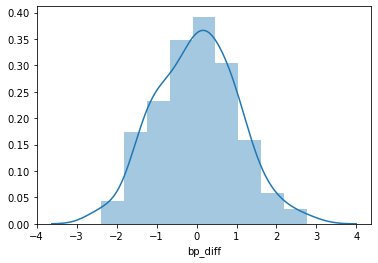

In [171]:
import seaborn as sns
sns.distplot(bp_reading['bp_diff'])

### Checking Normal distribution by Q-Q plot graph
https://www.statisticshowto.datasciencecentral.com/assumption-of-normality-test/

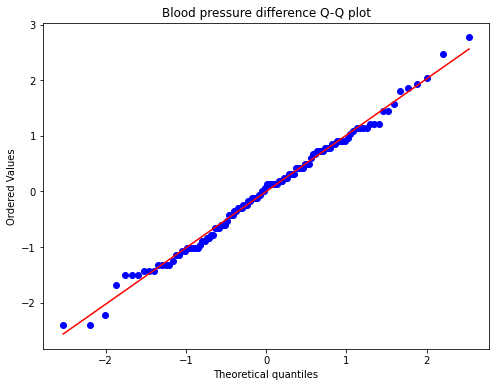

In [172]:
plt.figure(figsize=(8, 6))
stats.probplot(bp_reading['bp_diff'], plot=plt)

plt.title('Blood pressure difference Q-Q plot')
plt.show()

**Note:-** The corresponding points lies very close to line that means are our sample data sets are normally distributed

### Checking Normal distribution by method of `Shapiro stats`
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

In [173]:
# H0: your distribution comes from a normal distribution
stats.shapiro(bp_reading['bp_diff'])

(0.9926842451095581, 0.7841846942901611)

In [174]:
# H0: bp_reading['bp_after'] == bp_reading['bp_before']


stats.ttest_rel(bp_reading['bp_after'], bp_reading['bp_before'])

Ttest_relResult(statistic=-3.3371870510833657, pvalue=0.0011297914644840823)

Como p-value < 0.05 (0.001), isso significa que eu posso rejeitar a hipótese nula de que bp_reading['bp_after'] == bp_reading['bp_before']

In [186]:
stats.ttest_1samp(bp_reading['bp_after'] - bp_reading['bp_before'], 0)

Ttest_1sampResult(statistic=-3.3371870510833657, pvalue=0.0011297914644840823)

In [191]:
bp_reading['bp_after'].mean()

151.35833333333332

In [184]:
bp_reading['bp_after'].std()

14.177622226198423

In [201]:
stats.ttest_1samp(bp_reading['bp_after'], 148.8)

Ttest_1sampResult(statistic=1.9767163406211996, pvalue=0.050386469026410606)

### T-test using `researchpy`
https://researchpy.readthedocs.io/en/latest/ttest_documentation.html

In [205]:
rp.ttest(bp_reading['bp_after'], 
         bp_reading['bp_before'], 
         paired = True, equal_variances=False)

,Wilcoxon signed-rank test,results
0,Mean for bp_after =,151.358333
1,Mean for bp_before =,156.450000
2,T value =,2234.500000
3,Z value =,-3.191600
4,Two sided p value =,0.001400
5,r =,-0.206000


# One tailed-side ttest

H0: A >= B<br>
H1: A <  B

In [ ]:
from scipy.stats import ttest_ind, ttest_1samp

A = np.random.normal(5.5, 1, size=30)
B = np.random.normal(2.3, 1, size=30)

sns.distplot(A)
sns.distplot(B)

In [214]:
stats.ttest_rel(A, B)

Ttest_relResult(statistic=12.502958302214273, pvalue=3.320091746497631e-13)

In [ ]:
st, p_two_tailed = ttest_rel(A, B)

In [ ]:
# H0: A == 30 (nao é igual a 30)
# H1: A < 30

The null hypothesis is rejected. We can reject the hypothesis that A and B have the same mean.
pvalue == 0.03900300568813467
The mean of A is greater than the mean of B


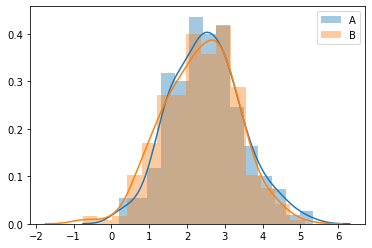

In [225]:
# Dividir por 2 o p-value da two-tailed
# Sinal da estatística T se refere à direção da hipótese alternativa (ou seja, se A>B ou A<B)

from scipy.stats import ttest_ind, ttest_1samp

A = np.random.normal(2.5, 1, size=300)
B = np.random.normal(2.3, 1, size=300)

sns.distplot(A)
sns.distplot(B)
plt.legend(['A','B'])

st, p_two_tailed = stats.ttest_rel(A, B)

# B.mean() - A.mean() 
p_one_tailed = p_two_tailed / 2


if p_one_tailed < 0.05:
    print('The null hypothesis is rejected. We can reject the hypothesis that A and B have the same mean.')
    print(f'pvalue == {p_one_tailed}')
    if st < 0:
        print('The mean of A is less than the mean of B')
    else:
        print('The mean of A is greater than the mean of B')    
else:
    print('The null hypothesis can`t be rejected')
    print(f'pvalue == {p_one_tailed}')